findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

分类器1 AUC: 0.000
分类器2 AUC: 0.000
AUC差值: 0.000
Z统计量: 0.000
P值: 1.000
差异显著性: 不显著


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

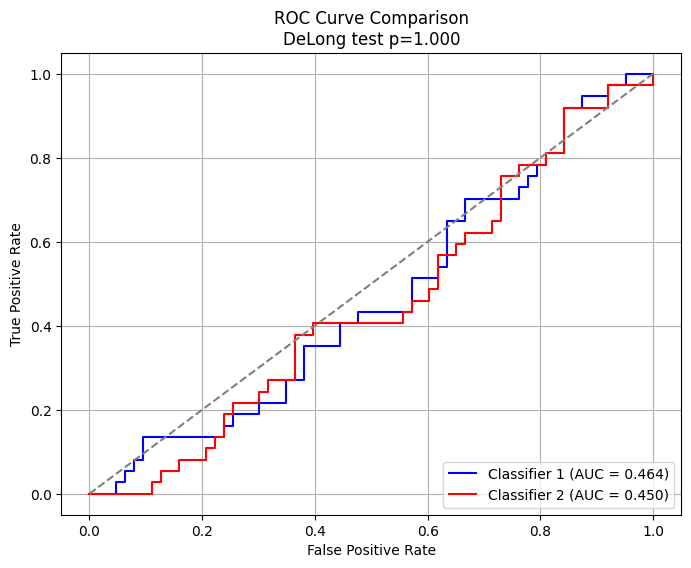

In [7]:
import numpy as np
from scipy import stats
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def compute_midrank(x):
    """计算mid-rank"""
    J = np.argsort(x)
    Z = x[J]
    N = len(x)
    T = np.zeros(N, dtype=float)  # 修改此处
    i = 0
    while i < N:
        j = i
        while j < N and Z[j] == Z[i]:
            j += 1
        T[i:j] = 0.5*(i + j - 1)
        i = j
    T2 = np.empty(N, dtype=float)  # 修改此处
    T2[J] = T + 1
    return T2

def compute_auc(rank_pos, n_pos, n_neg):
    """根据mid-rank计算AUC"""
    return (rank_pos.sum() - n_pos*(n_pos+1)/2) / (n_pos*n_neg)

def delong_test(y_true, pred1_scores, pred2_scores):
    """
    执行DeLong检验比较两个分类器的AUC
    
    参数:
    y_true: 真实标签 (0/1)
    pred1_scores: 第一个分类器的预测概率
    pred2_scores: 第二个分类器的预测概率
    
    返回:
    z_score: Z统计量
    p_value: p值
    auc1: 第一个分类器的AUC
    auc2: 第二个分类器的AUC
    """
    # 转换为numpy数组
    y_true = np.array(y_true)
    pred1_scores = np.array(pred1_scores)
    pred2_scores = np.array(pred2_scores)
    
    # 分离正负样本
    pos_mask = y_true == 1
    neg_mask = y_true == 0
    
    n_pos = np.sum(pos_mask)
    n_neg = np.sum(neg_mask)
    
    # 计算两个预测器的mid-ranks
    ranks1_pos = compute_midrank(pred1_scores[pos_mask])
    ranks1_neg = compute_midrank(pred1_scores[neg_mask])
    ranks2_pos = compute_midrank(pred2_scores[pos_mask])
    ranks2_neg = compute_midrank(pred2_scores[neg_mask])
    
    # 计算AUC
    auc1 = compute_auc(ranks1_pos, n_pos, n_neg)
    auc2 = compute_auc(ranks2_pos, n_pos, n_neg)
    
    # 计算方差
    V01 = (ranks1_pos - ranks2_pos) / n_neg
    V10 = (ranks1_neg - ranks2_neg) / n_pos
    
    var_auc = np.var(V01) / n_pos + np.var(V10) / n_neg
    
    # 计算Z统计量和p值
    z_score = (auc1 - auc2) / np.sqrt(var_auc)
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))
    
    return z_score, p_value, auc1, auc2

# 使用示例
def example_usage():
    # 生成示例数据
    np.random.seed(42)
    n_samples = 100
    y_true = np.random.binomial(1, 0.4, n_samples)
    
    # 模拟两个分类器的预测概率
    pred1_scores = np.random.random(n_samples)
    pred2_scores = np.random.random(n_samples)
    
    # 执行DeLong检验
    z_score, p_value, auc1, auc2 = delong_test(y_true, pred1_scores, pred2_scores)
    
    print(f"分类器1 AUC: {auc1:.3f}")
    print(f"分类器2 AUC: {auc2:.3f}")
    print(f"AUC差值: {abs(auc1-auc2):.3f}")
    print(f"Z统计量: {z_score:.3f}")
    print(f"P值: {p_value:.3f}")
    print(f"差异显著性: {'显著' if p_value < 0.05 else '不显著'}")

# 可视化比较
def plot_roc_comparison(y_true, pred1_scores, pred2_scores):
    
    
    # 计算ROC曲线
    fpr1, tpr1, _ = roc_curve(y_true, pred1_scores)
    fpr2, tpr2, _ = roc_curve(y_true, pred2_scores)
    
    # 计算AUC
    roc_auc1 = auc(fpr1, tpr1)
    roc_auc2 = auc(fpr2, tpr2)
    
    # 执行DeLong检验
    z_score, p_value, _, _ = delong_test(y_true, pred1_scores, pred2_scores)
    
    # 绘制ROC曲线
    plt.figure(figsize=(8, 6))
    plt.plot(fpr1, tpr1, color='blue',
             label=f'Classifier 1 (AUC = {roc_auc1:.3f})')
    plt.plot(fpr2, tpr2, color='red',
             label=f'Classifier 2 (AUC = {roc_auc2:.3f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve Comparison\nDeLong test p={p_value:.3f}')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

example_usage()
np.random.seed(42)
n_samples = 100
y_true = np.random.binomial(1, 0.4, n_samples)
    
# 模拟两个分类器的预测概率
pred1_scores = np.random.random(n_samples)
pred2_scores = np.random.random(n_samples)
plot_roc_comparison(y_true, pred1_scores, pred2_scores)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import roc_curve, roc_auc_score
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

def delong_roc_test(y_true, y_pred1, y_pred2):
    """
    DeLong检验实现
    
    参数:
    y_true: 真实标签
    y_pred1: 模型1的预测概率
    y_pred2: 模型2的预测概率
    
    返回:
    z_score: Z统计量
    p_value: p值
    """
    def compute_covariance(predictions, labels):
        n_samples = len(labels)
        pos_indices = np.where(labels == 1)[0]
        neg_indices = np.where(labels == 0)[0]
        n_pos = len(pos_indices)
        n_neg = len(neg_indices)
        
        pos_predictions = predictions[pos_indices]
        neg_predictions = predictions[neg_indices]
        
        # 计算V10和V01
        v10 = np.zeros(n_pos)
        v01 = np.zeros(n_neg)
        
        for i in range(n_pos):
            v10[i] = np.sum(pos_predictions[i] > neg_predictions) / n_neg
        
        for i in range(n_neg):
            v01[i] = np.sum(pos_predictions > neg_predictions[i]) / n_pos
        
        # 计算AUC
        auc = np.mean(v10)
        
        # 计算方差
        s10 = np.var(v10) / n_pos
        s01 = np.var(v01) / n_neg
        
        return auc, s10, s01

    # 计算两个模型的AUC和方差
    auc1, s10_1, s01_1 = compute_covariance(y_pred1, y_true)
    auc2, s10_2, s01_2 = compute_covariance(y_pred2, y_true)
    
    # 计算协方差
    n_pos = np.sum(y_true == 1)
    n_neg = np.sum(y_true == 0)
    
    # 计算Z统计量
    var = s10_1 + s01_1 + s10_2 + s01_2
    z_score = (auc1 - auc2) / np.sqrt(var)
    p_value = 2 * (1 - norm.cdf(abs(z_score)))
    
    return z_score, p_value

def compare_models_performance(models_dict, datasets_dict, dataset_names=None):
    """
    比较多个模型在多个数据集上的性能
    
    参数:
    models_dict: 字典，包含模型名称和模型对象
    datasets_dict: 字典，包含数据集名称和(X, y)元组
    dataset_names: 数据集名称列表，如果为None则使用datasets_dict的键
    
    返回:
    results_df: 包含所有比较结果的DataFrame
    """
    if dataset_names is None:
        dataset_names = list(datasets_dict.keys())
    
    results = []
    
    # 存储所有预测结果用于后续分析
    all_predictions = {model_name: {dataset: None for dataset in dataset_names} 
                      for model_name in models_dict.keys()}
    
    # 计算每个模型在每个数据集上的AUC
    for dataset_name in dataset_names:
        X, y = datasets_dict[dataset_name]
        
        for model_name, model in models_dict.items():
            try:
                y_pred = model.predict_proba(X)[:, 1]
                all_predictions[model_name][dataset_name] = (y, y_pred)
                auc = roc_auc_score(y, y_pred)
                results.append({
                    'Dataset': dataset_name,
                    'Model': model_name,
                    'AUC': auc
                })
            except Exception as e:
                print(f"Error with {model_name} on {dataset_name}: {str(e)}")
    
    # 进行DeLong检验
    model_names = list(models_dict.keys())
    for i in range(len(model_names)):
        for j in range(i+1, len(model_names)):
            model1, model2 = model_names[i], model_names[j]
            
            for dataset in dataset_names:
                if (all_predictions[model1][dataset] is not None and 
                    all_predictions[model2][dataset] is not None):
                    y_true = all_predictions[model1][dataset][0]
                    y_pred1 = all_predictions[model1][dataset][1]
                    y_pred2 = all_predictions[model2][dataset][1]
                    
                    z_score, p_value = delong_roc_test(y_true, y_pred1, y_pred2)
                    results.append({
                        'Dataset': dataset,
                        'Comparison': f'{model1} vs {model2}',
                        'Z-score': z_score,
                        'P-value': p_value
                    })
    
    return pd.DataFrame(results)

def plot_model_comparison(results_df, figsize=(15, 10)):
    """
    可视化模型比较结果
    
    参数:
    results_df: compare_models_performance函数返回的DataFrame
    figsize: 图形大小
    """
    plt.figure(figsize=figsize)
    
    # 1. AUC比较图
    plt.subplot(2, 2, 1)
    auc_data = results_df[results_df['AUC'].notna()]
    sns.barplot(x='Dataset', y='AUC', hue='Model', data=auc_data)
    plt.title('AUC Comparison Across Datasets')
    plt.xticks(rotation=45)
    
    # 2. 统计显著性热图
    plt.subplot(2, 2, 2)
    pivot_data = results_df[results_df['P-value'].notna()].pivot(
        index='Dataset', columns='Comparison', values='P-value')
    sns.heatmap(pivot_data, annot=True, cmap='RdYlGn_r', center=0.05)
    plt.title('P-values from DeLong Test')
    
    # 3. ROC曲线比较
    plt.subplot(2, 2, 3)
    for model_name in results_df['Model'].unique():
        if pd.isna(model_name):
            continue
        model_data = results_df[results_df['Model'] == model_name]
        plt.errorbar(x=range(len(model_data)), 
                    y=model_data['AUC'], 
                    label=model_name,
                    marker='o')
    plt.xticks(range(len(results_df['Dataset'].unique())), 
               results_df['Dataset'].unique(), rotation=45)
    plt.title('AUC Trends Across Datasets')
    plt.legend()
    
    # 4. P值分布图
    plt.subplot(2, 2, 4)
    p_values = results_df[results_df['P-value'].notna()]['P-value']
    sns.histplot(p_values, bins=20)
    plt.axvline(x=0.05, color='r', linestyle='--', label='α=0.05')
    plt.title('Distribution of P-values')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# 使用示例：
"""
# 假设你有以下数据和模型：
model1 = ... # 使用特征A训练的模型
model2 = ... # 使用特征B训练的模型
model3 = ... # 使用特征A+B训练的模型

# 准备数据集
datasets = {
    'Internal_Val': (X_val, y_val),
    'External_Val_1': (X_ext1, y_ext1),
    'External_Val_2': (X_ext2, y_ext2),
    'External_Val_3': (X_ext3, y_ext3)
}

# 定义模型字典
models = {
    'Model_A': model1,
    'Model_B': model2,
    'Model_AB': model3
}

# 进行比较
results = compare_models_performance(models, datasets)

# 可视化结果
plot_model_comparison(results)

# 打印详细结果
print("\nDetailed Results:")
print(results)
"""

In [24]:
import pandas as pd
# 读取proba和gt
data = pd.read_excel('./result/ring.xlsx')
# 按name排序
data = data.sort_values(by='name')

y_train = data[data['dataset'] == 'train']['ground_truth']
y_val = data[data['dataset'] == 'val']['ground_truth']
y_henan = data[data['dataset'] == 'henan']['ground_truth']
y_kits = data[data['dataset'] == 'kits']['ground_truth']

proba_train_ring = data[data['dataset'] == 'train']['probability']
proba_val_ring = data[data['dataset'] == 'val']['probability']
proba_henan_ring = data[data['dataset'] == 'henan']['probability']
proba_kits_ring = data[data['dataset'] == 'kits']['probability']

In [25]:
import pandas as pd
# 读取proba和gt
data = pd.read_excel('./result/rad.xlsx')
# 按name排序
data = data.sort_values(by='name')

proba_train_rad = data[data['dataset'] == 'train']['probability']
proba_val_rad = data[data['dataset'] == 'val']['probability']
proba_henan_rad = data[data['dataset'] == 'henan']['probability']
proba_kits_rad = data[data['dataset'] == 'kits']['probability']

In [33]:
import pandas as pd
# 读取proba和gt
data = pd.read_excel('./result/combined.xlsx')
# 按name排序
data = data.sort_values(by='name')

proba_train_sum = data[data['dataset'] == 'train']['probability']
proba_val_sum = data[data['dataset'] == 'val']['probability']
proba_henan_sum = data[data['dataset'] == 'henan']['probability']
proba_kits_sum = data[data['dataset'] == 'kits']['probability']

In [32]:
import pandas as pd
# 读取proba和gt
data = pd.read_excel('./result/dl.xlsx')
# 按name排序
data = data.sort_values(by='name')

proba_train_dl = data[data['dataset'] == 'train']['probability']
proba_val_dl = data[data['dataset'] == 'val']['probability']
proba_henan_dl = data[data['dataset'] == 'henan']['probability']
proba_kits_dl = data[data['dataset'] == 'kits']['probability']

=== DeLong Test Results ===
combined AUC: 0.800
radiomics AUC: 0.787
AUC Difference: 0.013
Standard Error: 0.030
Z-score: 0.445
P-value: 6.562e-01
=== DeLong Test Results ===
combined AUC: 0.800
ring AUC: 0.709
AUC Difference: 0.091
Standard Error: 0.030
Z-score: 3.054
P-value: 2.259e-03
=== DeLong Test Results ===
combined AUC: 0.693
radiomics AUC: 0.641
AUC Difference: 0.052
Standard Error: 0.023
Z-score: 2.299
P-value: 2.153e-02
=== DeLong Test Results ===
combined AUC: 0.693
ring AUC: 0.633
AUC Difference: 0.060
Standard Error: 0.022
Z-score: 2.739
P-value: 6.163e-03
=== DeLong Test Results ===
combined AUC: 0.676
radiomics AUC: 0.636
AUC Difference: 0.040
Standard Error: 0.023
Z-score: 1.747
P-value: 8.069e-02
=== DeLong Test Results ===
combined AUC: 0.676
ring AUC: 0.661
AUC Difference: 0.015
Standard Error: 0.021
Z-score: 0.700
P-value: 4.840e-01
=== DeLong Test Results ===
deep learning AUC: 0.818
radiomics AUC: 0.787
AUC Difference: 0.031
Standard Error: 0.071
Z-score: 0.432


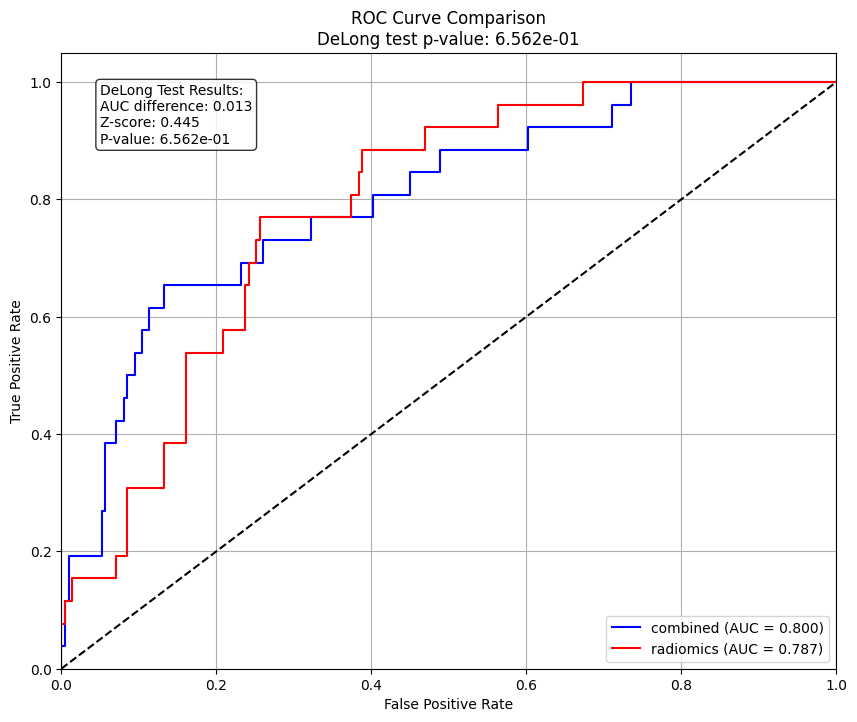

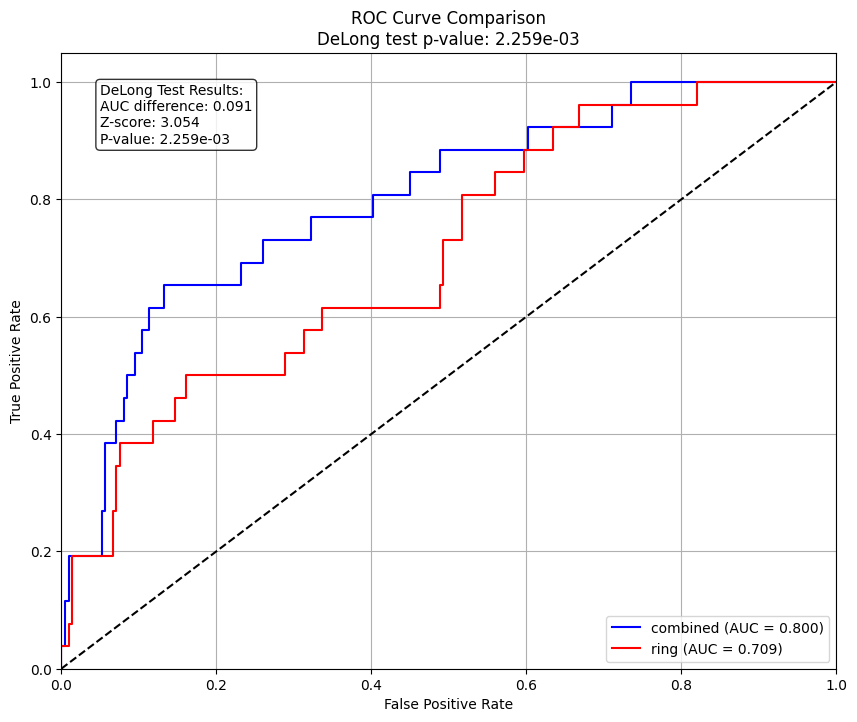

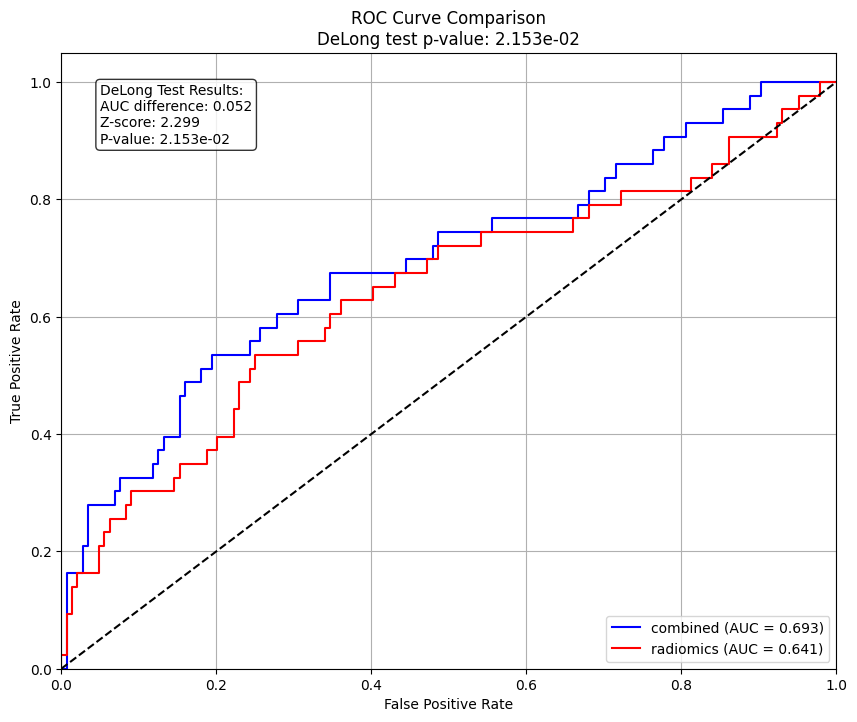

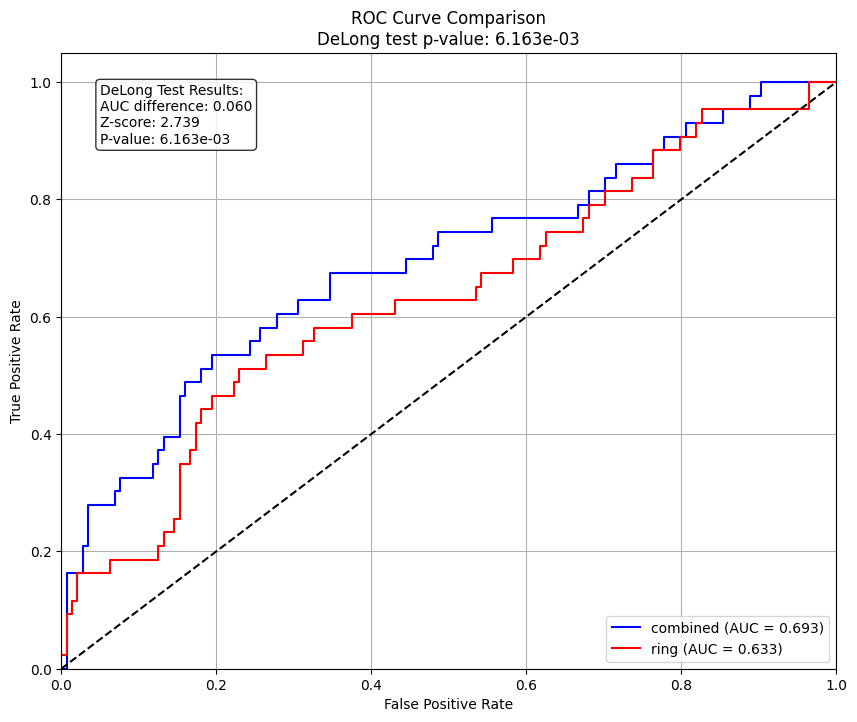

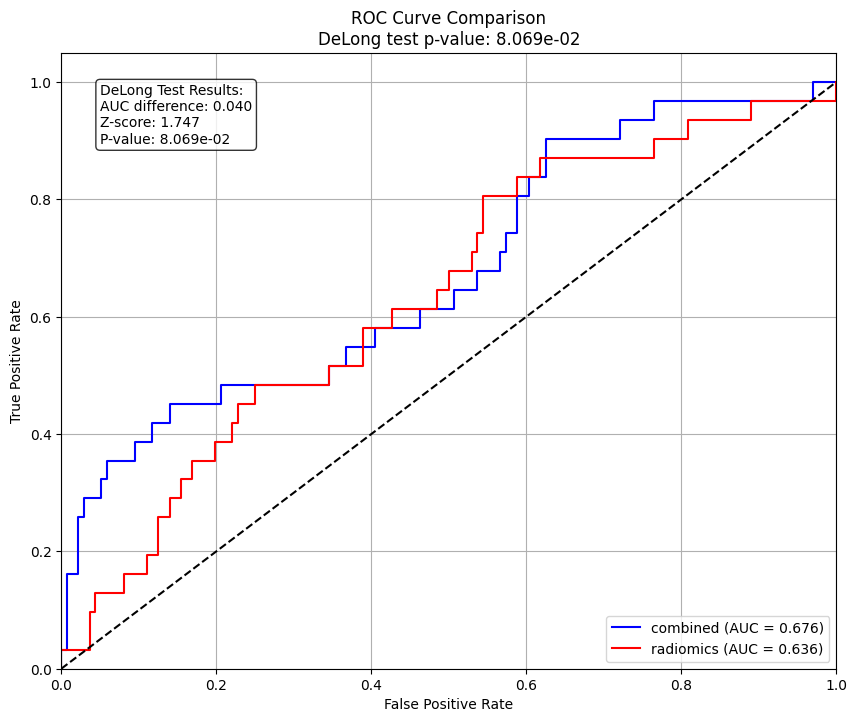

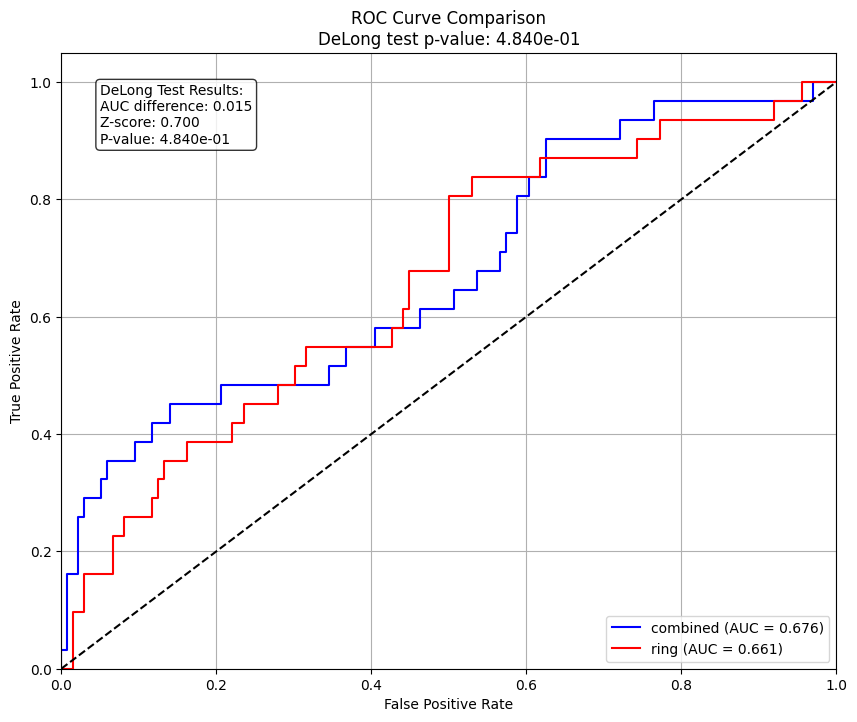

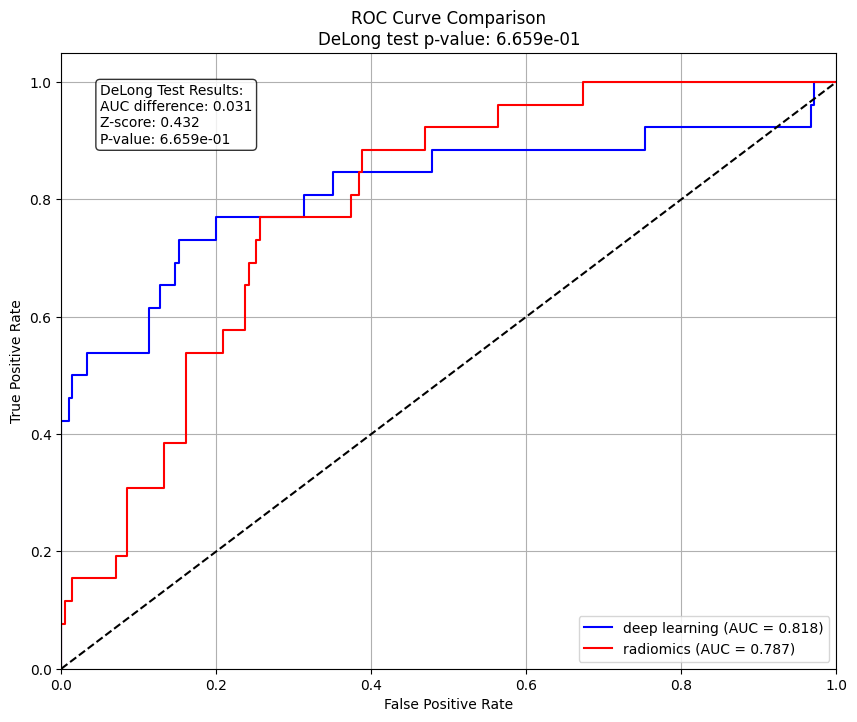

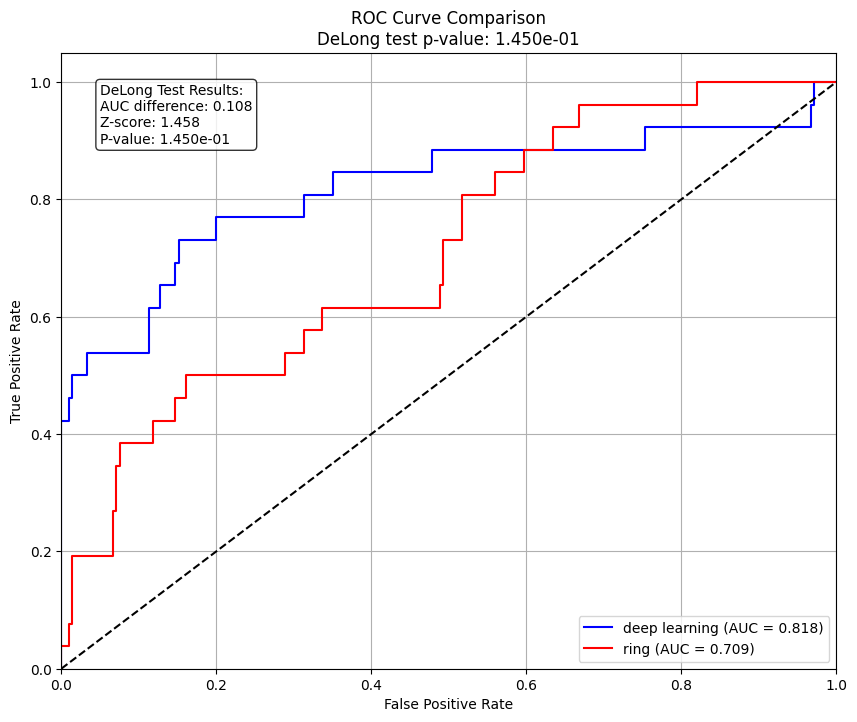

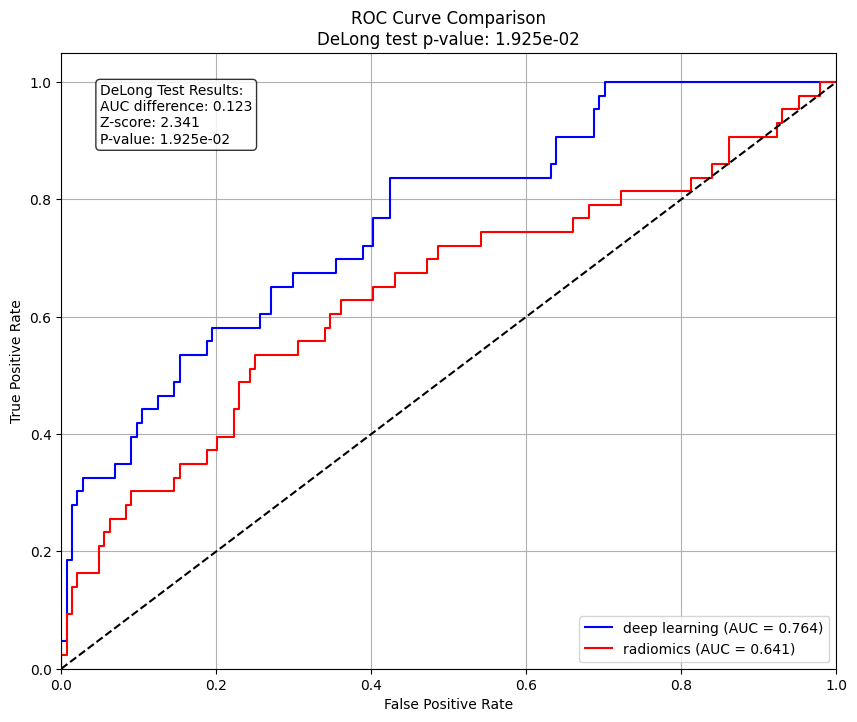

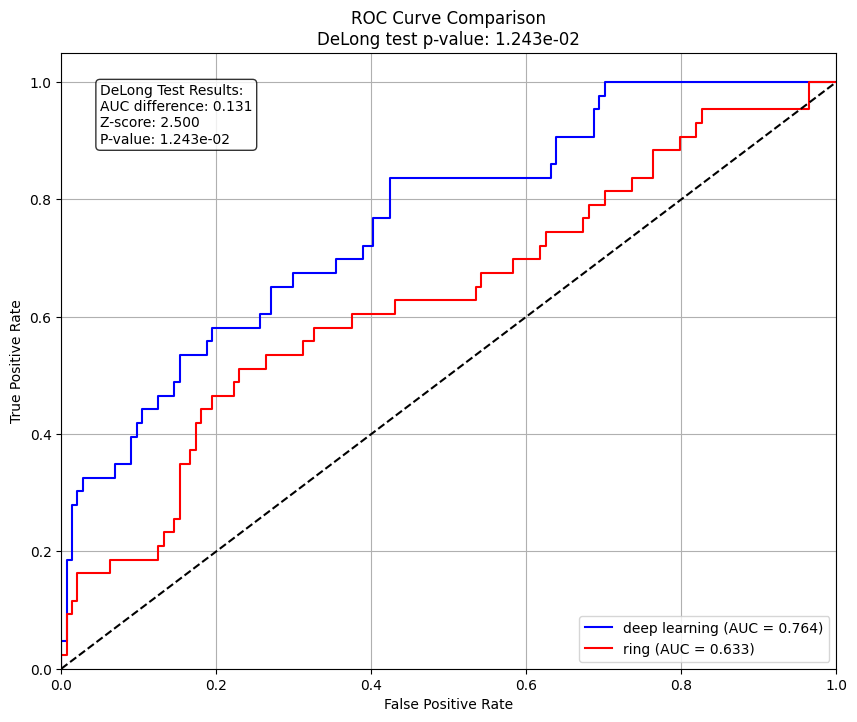

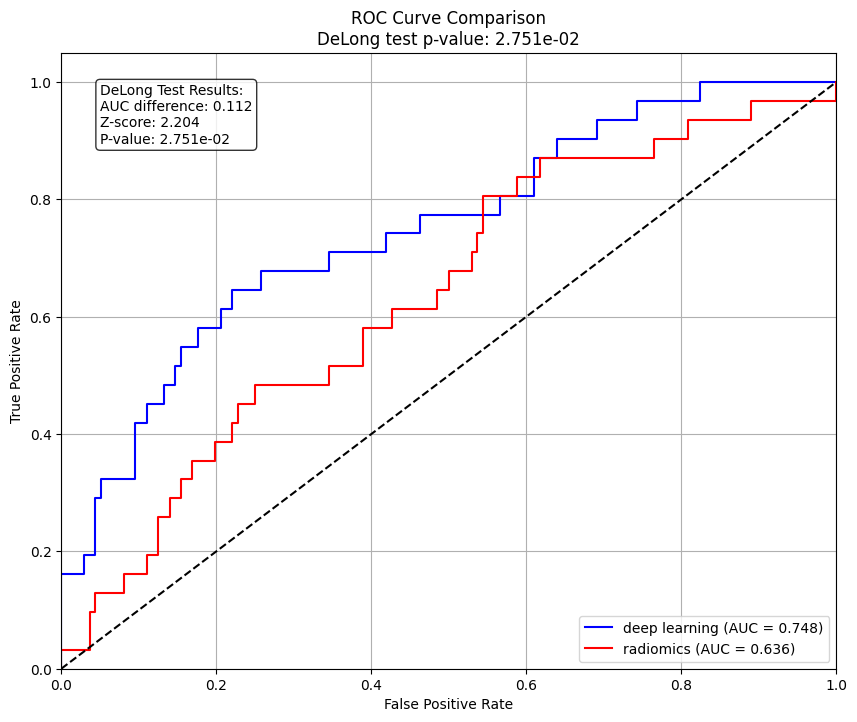

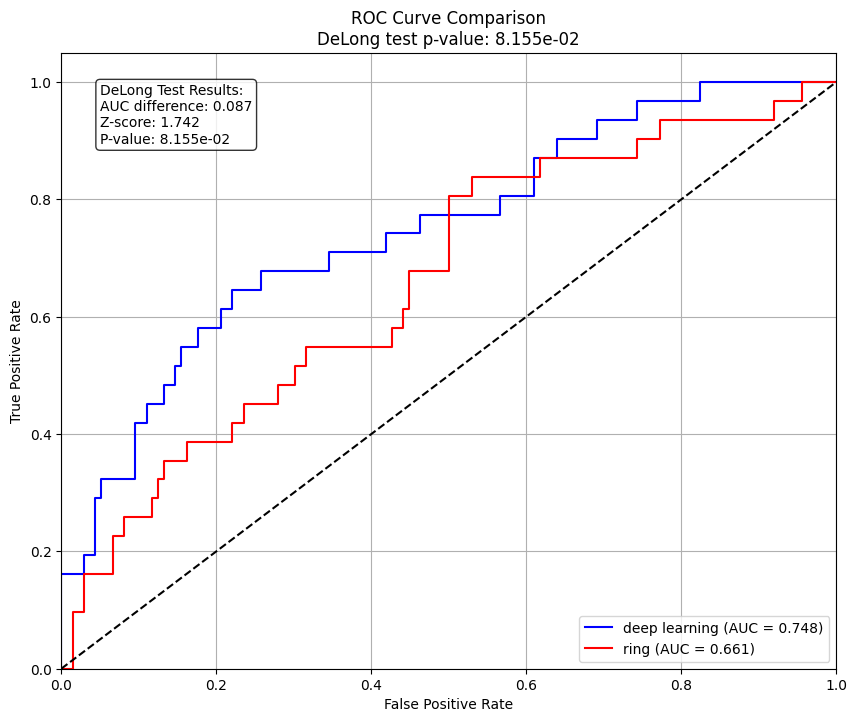

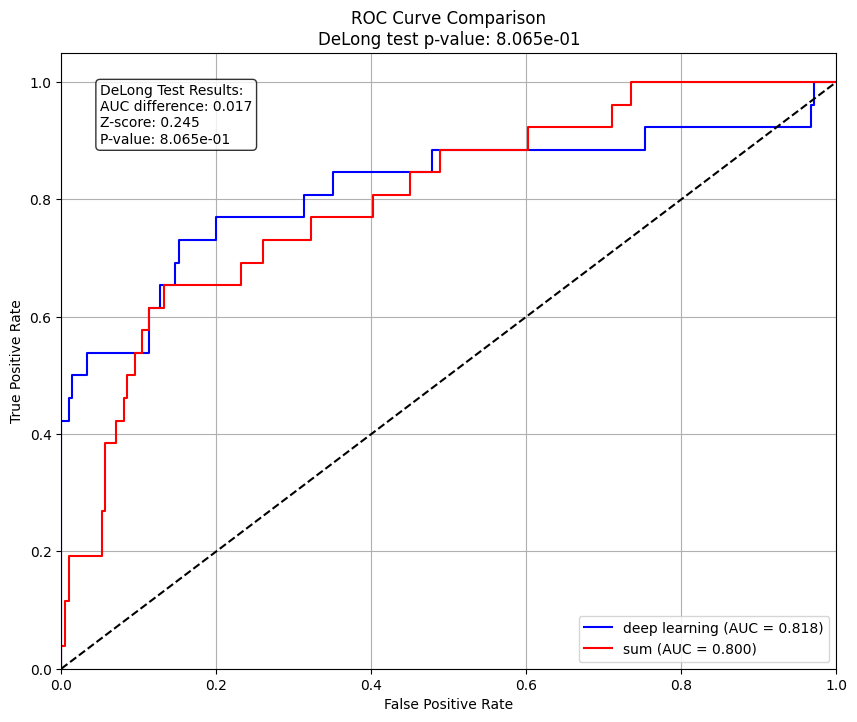

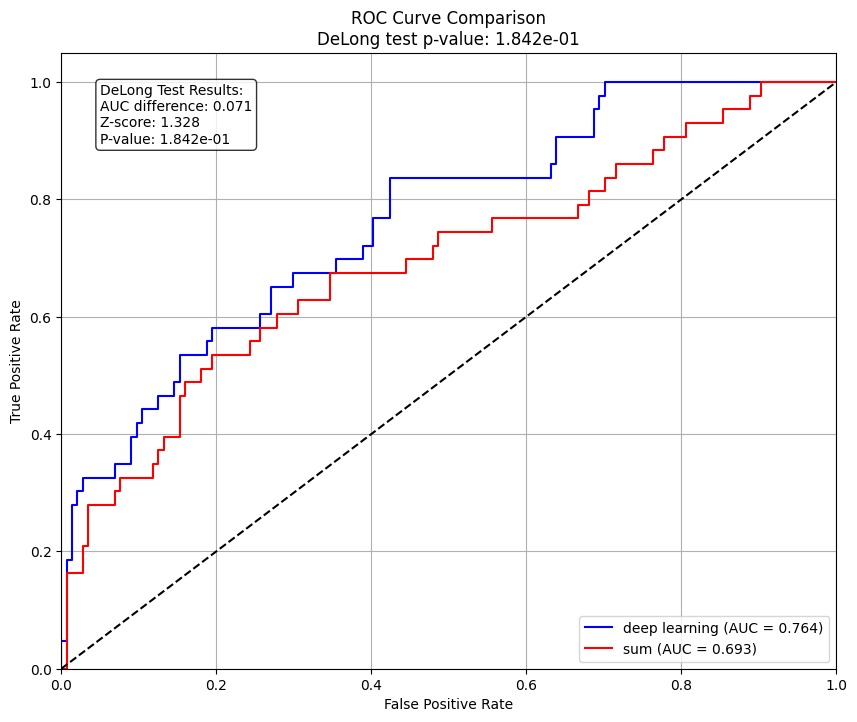

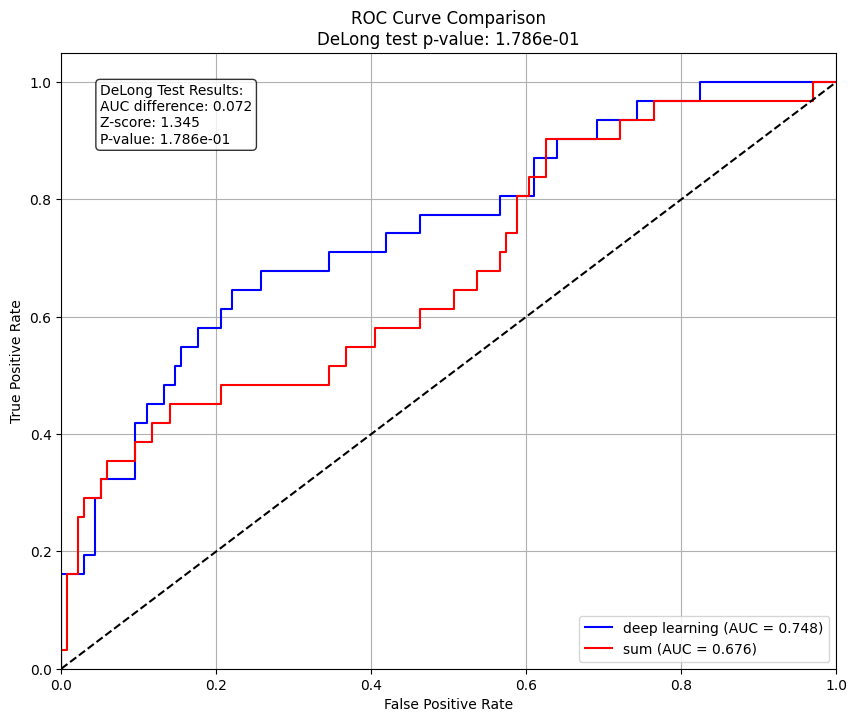

In [36]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import pandas as pd
from scipy.stats import norm

def compute_midrank(x):
    """Computes midranks.
    Args:
       x - a 1D numpy array
    Returns:
       array of midranks
    """
    J = np.argsort(x)
    Z = x[J]
    N = len(x)
    T = np.zeros(N, dtype=float)
    i = 0
    while i < N:
        j = i
        while j < N and Z[j] == Z[i]:
            j += 1
        T[i:j] = 0.5*(i + j - 1)
        i = j
    T2 = np.empty(N, dtype=float)
    # Note(kazeevn) +1 is due to Python using 0-based indexing
    # instead of 1-based in the AUC formula in the paper
    T2[J] = T + 1
    return T2

def compute_auc(x, y):
    """Computes AUC by sweeping threshold. Uses rank-based method.
    Args:
        x: (N, ) numpy array of predictions
        y: (N, ) numpy array of labels (0 or 1)
    Returns:
        AUC value
    """
    r = compute_midrank(x)
    num_positive = sum(y == 1)
    num_negative = len(y) - num_positive
    sum_positive = sum(r[y == 1])
    auc = ((sum_positive - num_positive*(num_positive+1)/2) /
           (num_negative*num_positive))
    return auc

def delong_roc_variance(ground_truth, predictions_one, predictions_two):
    """
    Computes variance of DeLong AUC ROC comparison.
    Args:
       ground_truth: (N, ) numpy array of binary labels
       predictions_one: (N, ) numpy array of predictions from first model
       predictions_two: (N, ) numpy array of predictions from second model
    Returns:
       variance of DeLong statistic
    """
    # Convert to numpy arrays if they're not already
    ground_truth = np.array(ground_truth)
    predictions_one = np.array(predictions_one)
    predictions_two = np.array(predictions_two)
    
    # Get positive and negative indices
    positive_indices = np.where(ground_truth == 1)[0]
    negative_indices = np.where(ground_truth == 0)[0]
    
    # Get number of positive and negative samples
    n1 = len(positive_indices)
    n2 = len(negative_indices)
    
    # Compute AUCs
    auc1 = compute_auc(predictions_one, ground_truth)
    auc2 = compute_auc(predictions_two, ground_truth)
    
    # Compute variance
    v01 = compute_variance(predictions_one, positive_indices, negative_indices)
    v02 = compute_variance(predictions_two, positive_indices, negative_indices)
    covariance = compute_covariance(predictions_one, predictions_two, 
                                  positive_indices, negative_indices)
    
    variance = v01/n1 + v02/n2 - 2*covariance/np.sqrt(n1*n2)
    return variance

def compute_variance(predictions, positive_indices, negative_indices):
    """
    Helper function for variance calculation
    """
    pos_data = predictions[positive_indices]
    neg_data = predictions[negative_indices]
    
    mx = np.mean(pos_data)
    my = np.mean(neg_data)
    
    pos_diff = pos_data - mx
    neg_diff = neg_data - my
    
    return np.sum(pos_diff**2)/(len(pos_data)-1) + np.sum(neg_diff**2)/(len(neg_data)-1)

def compute_covariance(pred1, pred2, positive_indices, negative_indices):
    """
    Helper function for covariance calculation
    """
    pos_data1 = pred1[positive_indices]
    neg_data1 = pred1[negative_indices]
    pos_data2 = pred2[positive_indices]
    neg_data2 = pred2[negative_indices]
    
    mx1 = np.mean(pos_data1)
    my1 = np.mean(neg_data1)
    mx2 = np.mean(pos_data2)
    my2 = np.mean(neg_data2)
    
    pos_diff1 = pos_data1 - mx1
    neg_diff1 = neg_data1 - my1
    pos_diff2 = pos_data2 - mx2
    neg_diff2 = neg_data2 - my2
    
    return (np.sum(pos_diff1*pos_diff2)/(len(pos_data1)-1) + 
            np.sum(neg_diff1*neg_diff2)/(len(neg_data1)-1))

def delong_test(ground_truth, predictions_one, predictions_two):
    """
    Computes DeLong test for comparison of two ROC curves.
    
    Args:
        ground_truth: Binary ground truth labels
        predictions_one: Predictions from first model
        predictions_two: Predictions from second model
        
    Returns:
        Dictionary containing test statistics and p-value
    """
    # Compute AUCs
    auc1 = compute_auc(predictions_one, ground_truth)
    auc2 = compute_auc(predictions_two, ground_truth)
    
    # Compute variance
    variance = delong_roc_variance(ground_truth, predictions_one, predictions_two)
    
    # Compute z-score
    z_score = (auc1 - auc2)/np.sqrt(variance)
    
    # Compute p-value (two-tailed test)
    p_value = 2 * (1 - norm.cdf(abs(z_score)))
    
    return {
        'auc1': auc1,
        'auc2': auc2,
        'variance': variance,
        'z_score': z_score,
        'p_value': p_value
    }

def plot_roc_comparison(ground_truth, predictions_one, predictions_two, 
                       model1_name="Model 1", model2_name="Model 2"):
    """
    Plots ROC curves for two models and shows DeLong test results.
    
    Args:
        ground_truth: Binary ground truth labels
        predictions_one: Predictions from first model
        predictions_two: Predictions from second model
        model1_name: Name of first model for legend
        model2_name: Name of second model for legend
    """
    # Compute ROC curves
    fpr1, tpr1, _ = roc_curve(ground_truth, predictions_one)
    fpr2, tpr2, _ = roc_curve(ground_truth, predictions_two)
    
    # Compute AUCs
    roc_auc1 = auc(fpr1, tpr1)
    roc_auc2 = auc(fpr2, tpr2)
    
    # Perform DeLong test
    delong_results = delong_test(ground_truth, predictions_one, predictions_two)
    
    # Create plot
    plt.figure(figsize=(10, 8))
    plt.plot(fpr1, tpr1, 'b-', label=f'{model1_name} (AUC = {roc_auc1:.3f})')
    plt.plot(fpr2, tpr2, 'r-', label=f'{model2_name} (AUC = {roc_auc2:.3f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison\n' + 
             f'DeLong test p-value: {delong_results["p_value"]:.3e}')
    plt.legend(loc="lower right")
    plt.grid(True)
    
    # Add DeLong test results as text
    text = (f'DeLong Test Results:\n'
            f'AUC difference: {delong_results["auc1"]-delong_results["auc2"]:.3f}\n'
            f'Z-score: {delong_results["z_score"]:.3f}\n'
            f'P-value: {delong_results["p_value"]:.3e}')
    plt.text(0.05, 0.95, text, transform=plt.gca().transAxes, 
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    return plt.gcf()

# 使用示例
def compare_models(gt, proba1, proba2, model1_name="Model 1", model2_name="Model 2"):
    """
    比较两个模型的性能并生成报告
    
    Args:
        gt: 真实标签
        proba1: 第一个模型的预测概率
        proba2: 第二个模型的预测概率
        model1_name: 第一个模型的名称
        model2_name: 第二个模型的名称
    """
    # 确保输入数据类型正确
    gt = np.array(gt)
    proba1 = np.array(proba1)
    proba2 = np.array(proba2)
    
    # 执行DeLong测试
    results = delong_test(gt, proba1, proba2)
    
    # 打印详细结果
    print("=== DeLong Test Results ===")
    print(f"{model1_name} AUC: {results['auc1']:.3f}")
    print(f"{model2_name} AUC: {results['auc2']:.3f}")
    print(f"AUC Difference: {results['auc1']-results['auc2']:.3f}")
    print(f"Standard Error: {np.sqrt(results['variance']):.3f}")
    print(f"Z-score: {results['z_score']:.3f}")
    print(f"P-value: {results['p_value']:.3e}")
    
    # 绘制ROC曲线比较图
    fig = plot_roc_comparison(gt, proba1, proba2, model1_name, model2_name)
    
    return results, fig


# 比较模型
results, fig = compare_models(y_val, proba_val_sum, proba_val_rad, 
                            model1_name="combined", 
                            model2_name="radiomics")

fig.savefig('roc_comparison_rad_sum_inter.png', dpi=600, bbox_inches='tight')

results, fig = compare_models(y_val, proba_val_sum, proba_val_ring, 
                            model1_name="combined", 
                            model2_name="ring")
fig.savefig('roc_comparison_ring_sum_inter.png', dpi=600, bbox_inches='tight')

results, fig = compare_models(y_henan, proba_henan_sum, proba_henan_rad, 
                            model1_name="combined", 
                            model2_name="radiomics")

fig.savefig('roc_comparison_rad_sum_henan.png', dpi=600, bbox_inches='tight')

results, fig = compare_models(y_henan, proba_henan_sum, proba_henan_ring, 
                            model1_name="combined", 
                            model2_name="ring")
fig.savefig('roc_comparison_ring_sum_henan.png', dpi=600, bbox_inches='tight')

results, fig = compare_models(y_kits, proba_kits_sum, proba_kits_rad, 
                            model1_name="combined", 
                            model2_name="radiomics")

fig.savefig('roc_comparison_rad_sum_kits.png', dpi=600, bbox_inches='tight')

results, fig = compare_models(y_kits, proba_kits_sum, proba_kits_ring, 
                            model1_name="combined", 
                            model2_name="ring")
fig.savefig('roc_comparison_ring_sum_kits.png', dpi=600, bbox_inches='tight')

# 比较深度学习和机器学习算法
results, fig = compare_models(y_val, proba_val_dl, proba_val_rad,
                            model1_name="deep learning",
                            model2_name="radiomics")
fig.savefig('roc_comparison_dl_rad_inter.png', dpi=600, bbox_inches='tight')

results, fig = compare_models(y_val, proba_val_dl, proba_val_ring,
                            model1_name="deep learning",
                            model2_name="ring")
fig.savefig('roc_comparison_dl_ring_inter.png', dpi=600, bbox_inches='tight')
results, fig = compare_models(y_henan, proba_henan_dl, proba_henan_rad,
                            model1_name="deep learning",
                            model2_name="radiomics")
fig.savefig('roc_comparison_dl_rad_henan.png', dpi=600, bbox_inches='tight')

results, fig = compare_models(y_henan, proba_henan_dl, proba_henan_ring,
                            model1_name="deep learning",
                            model2_name="ring")
fig.savefig('roc_comparison_dl_ring_henan.png', dpi=600, bbox_inches='tight')

results, fig = compare_models(y_kits, proba_kits_dl, proba_kits_rad,
                            model1_name="deep learning",
                            model2_name="radiomics")
fig.savefig('roc_comparison_dl_rad_kits.png', dpi=600, bbox_inches='tight')

results, fig = compare_models(y_kits, proba_kits_dl, proba_kits_ring,
                            model1_name="deep learning",
                            model2_name="ring")
fig.savefig('roc_comparison_dl_ring_kits.png', dpi=600, bbox_inches='tight')

# 比较深度学习和sum
results, fig = compare_models(y_val, proba_val_dl, proba_val_sum,
                            model1_name="deep learning",
                            model2_name="sum")
fig.savefig('roc_comparison_dl_sum_inter.png', dpi=600, bbox_inches='tight')

results, fig = compare_models(y_henan, proba_henan_dl, proba_henan_sum,
                            model1_name="deep learning",
                            model2_name="sum")
fig.savefig('roc_comparison_dl_sum_henan.png', dpi=600, bbox_inches='tight')

results, fig = compare_models(y_kits, proba_kits_dl, proba_kits_sum,
                            model1_name="deep learning",
                            model2_name="sum")
fig.savefig('roc_comparison_dl_sum_kits.png', dpi=600, bbox_inches='tight')
                              

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import pandas as pd
from scipy.stats import norm

def compute_midrank(x):
    """Computes midranks.
    Args:
       x - a 1D numpy array
    Returns:
       array of midranks
    """
    J = np.argsort(x)
    Z = x[J]
    N = len(x)
    T = np.zeros(N, dtype=float)
    i = 0
    while i < N:
        j = i
        while j < N and Z[j] == Z[i]:
            j += 1
        T[i:j] = 0.5*(i + j - 1)
        i = j
    T2 = np.empty(N, dtype=float)
    # Note(kazeevn) +1 is due to Python using 0-based indexing
    # instead of 1-based in the AUC formula in the paper
    T2[J] = T + 1
    return T2

def compute_auc(x, y):
    """Computes AUC by sweeping threshold. Uses rank-based method.
    Args:
        x: (N, ) numpy array of predictions
        y: (N, ) numpy array of labels (0 or 1)
    Returns:
        AUC value
    """
    r = compute_midrank(x)
    num_positive = sum(y == 1)
    num_negative = len(y) - num_positive
    sum_positive = sum(r[y == 1])
    auc = ((sum_positive - num_positive*(num_positive+1)/2) /
           (num_negative*num_positive))
    return auc

def delong_roc_variance(ground_truth, predictions_one, predictions_two):
    """
    Computes variance of DeLong AUC ROC comparison.
    Args:
       ground_truth: (N, ) numpy array of binary labels
       predictions_one: (N, ) numpy array of predictions from first model
       predictions_two: (N, ) numpy array of predictions from second model
    Returns:
       variance of DeLong statistic
    """
    # Convert to numpy arrays if they're not already
    ground_truth = np.array(ground_truth)
    predictions_one = np.array(predictions_one)
    predictions_two = np.array(predictions_two)
    
    # Get positive and negative indices
    positive_indices = np.where(ground_truth == 1)[0]
    negative_indices = np.where(ground_truth == 0)[0]
    
    # Get number of positive and negative samples
    n1 = len(positive_indices)
    n2 = len(negative_indices)
    
    # Compute AUCs
    auc1 = compute_auc(predictions_one, ground_truth)
    auc2 = compute_auc(predictions_two, ground_truth)
    
    # Compute variance
    v01 = compute_variance(predictions_one, positive_indices, negative_indices)
    v02 = compute_variance(predictions_two, positive_indices, negative_indices)
    covariance = compute_covariance(predictions_one, predictions_two, 
                                  positive_indices, negative_indices)
    
    variance = v01/n1 + v02/n2 - 2*covariance/np.sqrt(n1*n2)
    return variance

def compute_variance(predictions, positive_indices, negative_indices):
    """
    Helper function for variance calculation
    """
    pos_data = predictions[positive_indices]
    neg_data = predictions[negative_indices]
    
    mx = np.mean(pos_data)
    my = np.mean(neg_data)
    
    pos_diff = pos_data - mx
    neg_diff = neg_data - my
    
    return np.sum(pos_diff**2)/(len(pos_data)-1) + np.sum(neg_diff**2)/(len(neg_data)-1)

def compute_covariance(pred1, pred2, positive_indices, negative_indices):
    """
    Helper function for covariance calculation
    """
    pos_data1 = pred1[positive_indices]
    neg_data1 = pred1[negative_indices]
    pos_data2 = pred2[positive_indices]
    neg_data2 = pred2[negative_indices]
    
    mx1 = np.mean(pos_data1)
    my1 = np.mean(neg_data1)
    mx2 = np.mean(pos_data2)
    my2 = np.mean(neg_data2)
    
    pos_diff1 = pos_data1 - mx1
    neg_diff1 = neg_data1 - my1
    pos_diff2 = pos_data2 - mx2
    neg_diff2 = neg_data2 - my2
    
    return (np.sum(pos_diff1*pos_diff2)/(len(pos_data1)-1) + 
            np.sum(neg_diff1*neg_diff2)/(len(neg_data1)-1))

def delong_test(ground_truth, predictions_one, predictions_two):
    """
    Computes DeLong test for comparison of two ROC curves.
    
    Args:
        ground_truth: Binary ground truth labels
        predictions_one: Predictions from first model
        predictions_two: Predictions from second model
        
    Returns:
        Dictionary containing test statistics and p-value
    """
    # Compute AUCs
    auc1 = compute_auc(predictions_one, ground_truth)
    auc2 = compute_auc(predictions_two, ground_truth)
    
    # Compute variance
    variance = delong_roc_variance(ground_truth, predictions_one, predictions_two)
    
    # Compute z-score
    z_score = (auc1 - auc2)/np.sqrt(variance)
    
    # Compute p-value (two-tailed test)
    p_value = 2 * (1 - norm.cdf(abs(z_score)))
    
    return {
        'auc1': auc1,
        'auc2': auc2,
        'variance': variance,
        'z_score': z_score,
        'p_value': p_value
    }

def plot_roc_comparison(ground_truth, predictions_one, predictions_two, 
                       model1_name="Model 1", model2_name="Model 2"):
    """
    Plots ROC curves for two models and shows DeLong test results.
    
    Args:
        ground_truth: Binary ground truth labels
        predictions_one: Predictions from first model
        predictions_two: Predictions from second model
        model1_name: Name of first model for legend
        model2_name: Name of second model for legend
    """
    # Compute ROC curves
    fpr1, tpr1, _ = roc_curve(ground_truth, predictions_one)
    fpr2, tpr2, _ = roc_curve(ground_truth, predictions_two)
    
    # Compute AUCs
    roc_auc1 = auc(fpr1, tpr1)
    roc_auc2 = auc(fpr2, tpr2)
    
    # Perform DeLong test
    delong_results = delong_test(ground_truth, predictions_one, predictions_two)
    
    # Create plot
    plt.figure(figsize=(10, 8))
    plt.plot(fpr1, tpr1, 'b-', label=f'{model1_name} (AUC = {roc_auc1:.3f})')
    plt.plot(fpr2, tpr2, 'r-', label=f'{model2_name} (AUC = {roc_auc2:.3f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison\n' + 
             f'DeLong test p-value: {delong_results["p_value"]:.3e}')
    plt.legend(loc="lower right")
    plt.grid(True)
    
    # Add DeLong test results as text
    text = (f'DeLong Test Results:\n'
            f'AUC difference: {delong_results["auc1"]-delong_results["auc2"]:.3f}\n'
            f'Z-score: {delong_results["z_score"]:.3f}\n'
            f'P-value: {delong_results["p_value"]:.3e}')
    plt.text(0.05, 0.95, text, transform=plt.gca().transAxes, 
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    return plt.gcf()

# 使用示例
def compare_models(gt, proba1, proba2, model1_name="Model 1", model2_name="Model 2"):
    """
    比较两个模型的性能并生成报告
    
    Args:
        gt: 真实标签
        proba1: 第一个模型的预测概率
        proba2: 第二个模型的预测概率
        model1_name: 第一个模型的名称
        model2_name: 第二个模型的名称
    """
    # 确保输入数据类型正确
    gt = np.array(gt)
    proba1 = np.array(proba1)
    proba2 = np.array(proba2)
    
    # 执行DeLong测试
    results = delong_test(gt, proba1, proba2)
    
    # 打印详细结果
    print("=== DeLong Test Results ===")
    print(f"{model1_name} AUC: {results['auc1']:.3f}")
    print(f"{model2_name} AUC: {results['auc2']:.3f}")
    print(f"AUC Difference: {results['auc1']-results['auc2']:.3f}")
    print(f"Standard Error: {np.sqrt(results['variance']):.3f}")
    print(f"Z-score: {results['z_score']:.3f}")
    print(f"P-value: {results['p_value']:.3e}")
    
    # 绘制ROC曲线比较图
    fig = plot_roc_comparison(gt, proba1, proba2, model1_name, model2_name)
    
    return results, fig


# 比较模型
results, fig = compare_models(y_val, proba_val_sum, proba_val_rad, 
                            model1_name="combined", 
                            model2_name="radiomics")

fig.savefig('roc_comparison_rad_dl_inter.png', dpi=600, bbox_inches='tight')

results, fig = compare_models(y_val, proba_val_sum, proba_val_ring, 
                            model1_name="combined", 
                            model2_name="ring")
fig.savefig('roc_comparison_ring_dl_inter.png', dpi=600, bbox_inches='tight')

results, fig = compare_models(y_henan, proba_henan_sum, proba_henan_rad, 
                            model1_name="combined", 
                            model2_name="radiomics")

fig.savefig('roc_comparison_rad_dl_henan.png', dpi=600, bbox_inches='tight')

results, fig = compare_models(y_henan, proba_henan_sum, proba_henan_ring, 
                            model1_name="combined", 
                            model2_name="ring")
fig.savefig('roc_comparison_ring_dl_henan.png', dpi=600, bbox_inches='tight')

results, fig = compare_models(y_kits, proba_kits_sum, proba_kits_rad, 
                            model1_name="combined", 
                            model2_name="radiomics")

fig.savefig('roc_comparison_rad_dl_kits.png', dpi=600, bbox_inches='tight')

results, fig = compare_models(y_kits, proba_kits_sum, proba_kits_ring, 
                            model1_name="combined", 
                            model2_name="ring")
fig.savefig('roc_comparison_ring_dl_kits.png', dpi=600, bbox_inches='tight')

# print(proba_val_sum, proba_val_rad)
